In [1]:
import sys
import os
import numpy
from numpy import ndarray
from typing import List
from matplotlib.legend import Legend
from matplotlib import pyplot as pyplot

base_dir: str = os.getcwd()
os.environ['LAMMPS_PYTHON_BASE_PATH'] =  os.path.join(base_dir, '../../../../../md-analysis-tutorial/python/src')
sys.path.append(os.getenv('LAMMPS_PYTHON_BASE_PATH'))

from modules.line_graph import LineGraph

base_dir: str = os.getcwd()

# Extract timestep and atom type 1 & 2 cylinder population from atom population .dat files

In [2]:
# File contains columns of data, the .T transpose operation switches them to rows, making it easier to
# unpack into separate variables
time, atom_type_1_pop_inside_cylinder = numpy.loadtxt(
    os.path.join(
        base_dir,
        '../data/raw/atom-population/output_atom_type_1_population_inside_cylinder_vs_time.dat'
    )
).T

# Subtracts the first element from every element in the time array, ensuring the first element is 0/the time starts
# at zero
time -= time[0]

# Multiply each element by the timestep value
time *= 0.005

# The `_` name is a conventional placeholder for a variable that is to be ignored. We ignore the time data as we
# have already unpacked it
_, atom_type_2_pop_inside_cylinder = numpy.loadtxt(
    os.path.join(
        base_dir,
        '../data/raw/atom-population/output_atom_type_2_population_inside_cylinder_vs_time.dat'
    )
).T

# Combine time, atom type 1 & atom type 2 data into two separate ndarrays
atom_population_vs_time_data_array: List[ndarray] = [
    numpy.vstack((time, atom_type_1_pop_inside_cylinder)),
    numpy.vstack((time, atom_type_2_pop_inside_cylinder))
]

# Create Matplotlib graph to plot atom type 1 & type 2 cylinder population vs time

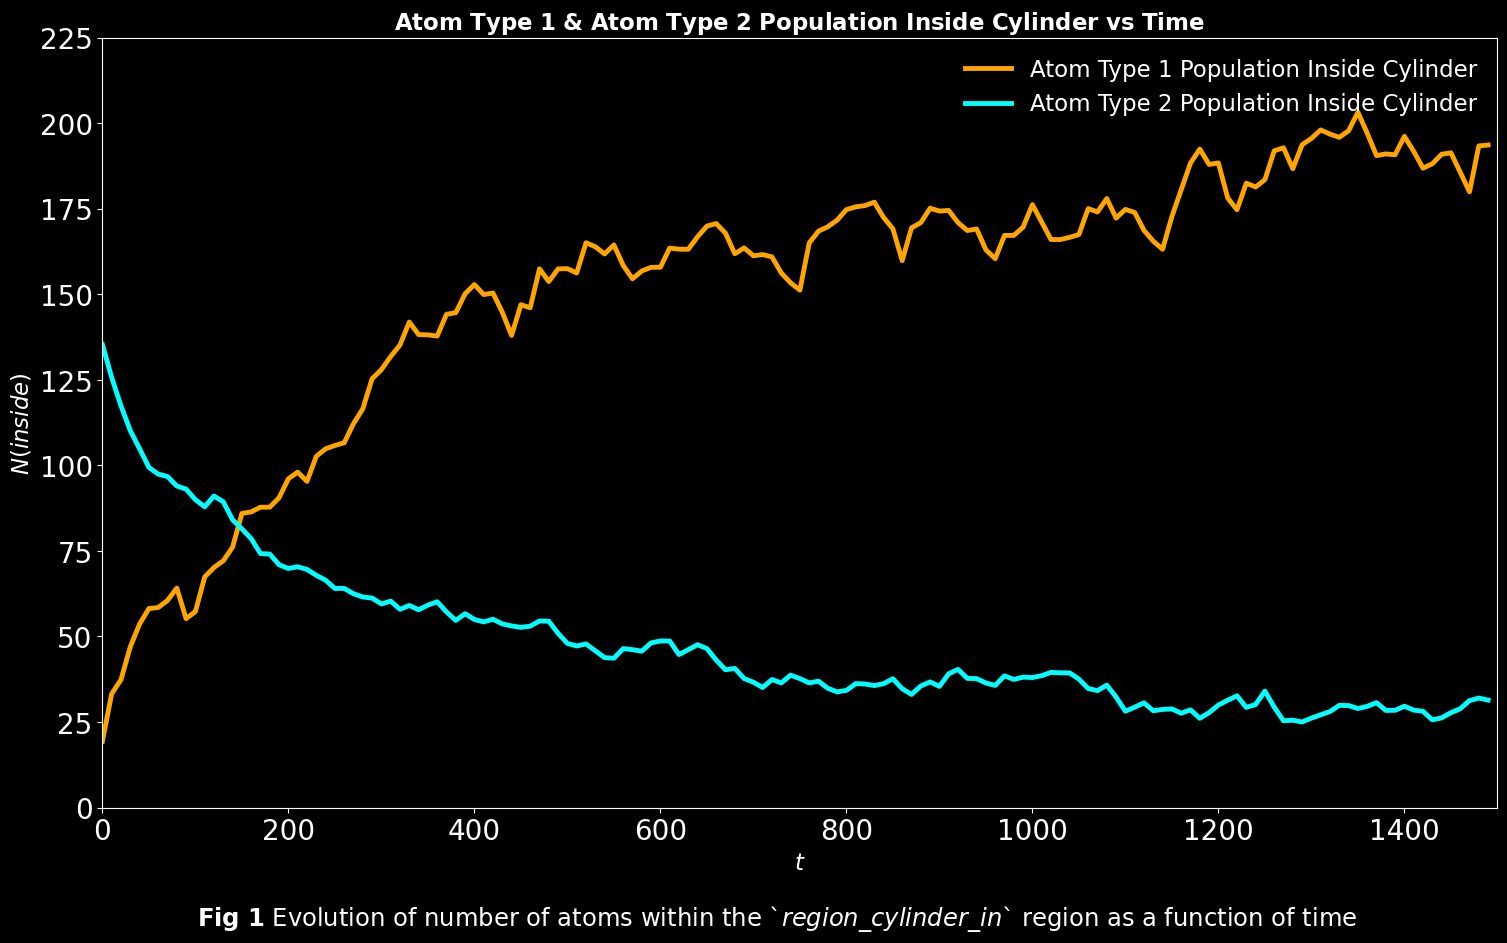

In [3]:
 # Plot 'atom population vs time' line graph
LineGraph.single_line_graph(
    data_arrays=atom_population_vs_time_data_array,
    figure_size=(18, 10),
    line_labels=['Atom Type 1 Population Inside Cylinder', 'Atom Type 2 Population Inside Cylinder'],
    line_colours=['orange', 'cyan'],
    x_label=r'$t$',
    y_label=r'$N(inside)$',
    x_lim=(0, 1500),
    y_lim=(0, 225),
    graph_title=r'$\bf{Atom\ Type\ 1\ &\ Atom\ Type\ 2\ Population\ Inside\ Cylinder\ vs\ Time}$',
    figure_text=r'$\bf{Fig\ 1}$ Evolution of number of atoms within the `$region\_cylinder\_in$` region as a '
                r'function of time',
    figure_text_font_size=17.5,
    figure_text_x_coord=0.5,
    figure_text_y_coord=-0.0005,
    font_size=16.5,
    tick_label_size=20,
    line_width=3.5,
    save_path=os.path.join(base_dir, '../reports/figures/graphs/atom_type_1_2_cylinder_population_vs_time.png')
)

# Extract atom type 1 coordination number data from `output_average_atom_type_1_coordination_number.dat`

In [4]:
# Unpack coordination number data. Again, time data is ignored as it has already been unpacked
_, atom_type_1_coordination_number = numpy.loadtxt(
    os.path.join(
        base_dir,
        '../data/raw/atom-coordination-number/output_average_atom_type_1_coordination_number.dat'
    )
).T

# Combine time and atom coordination number data into ndarray
atom_coordination_number_vs_time_data_array: List[ndarray] = [
    numpy.vstack((time, atom_type_1_coordination_number))
]

# Create Matplotlib graph to plot atom type 1 coordination number vs time

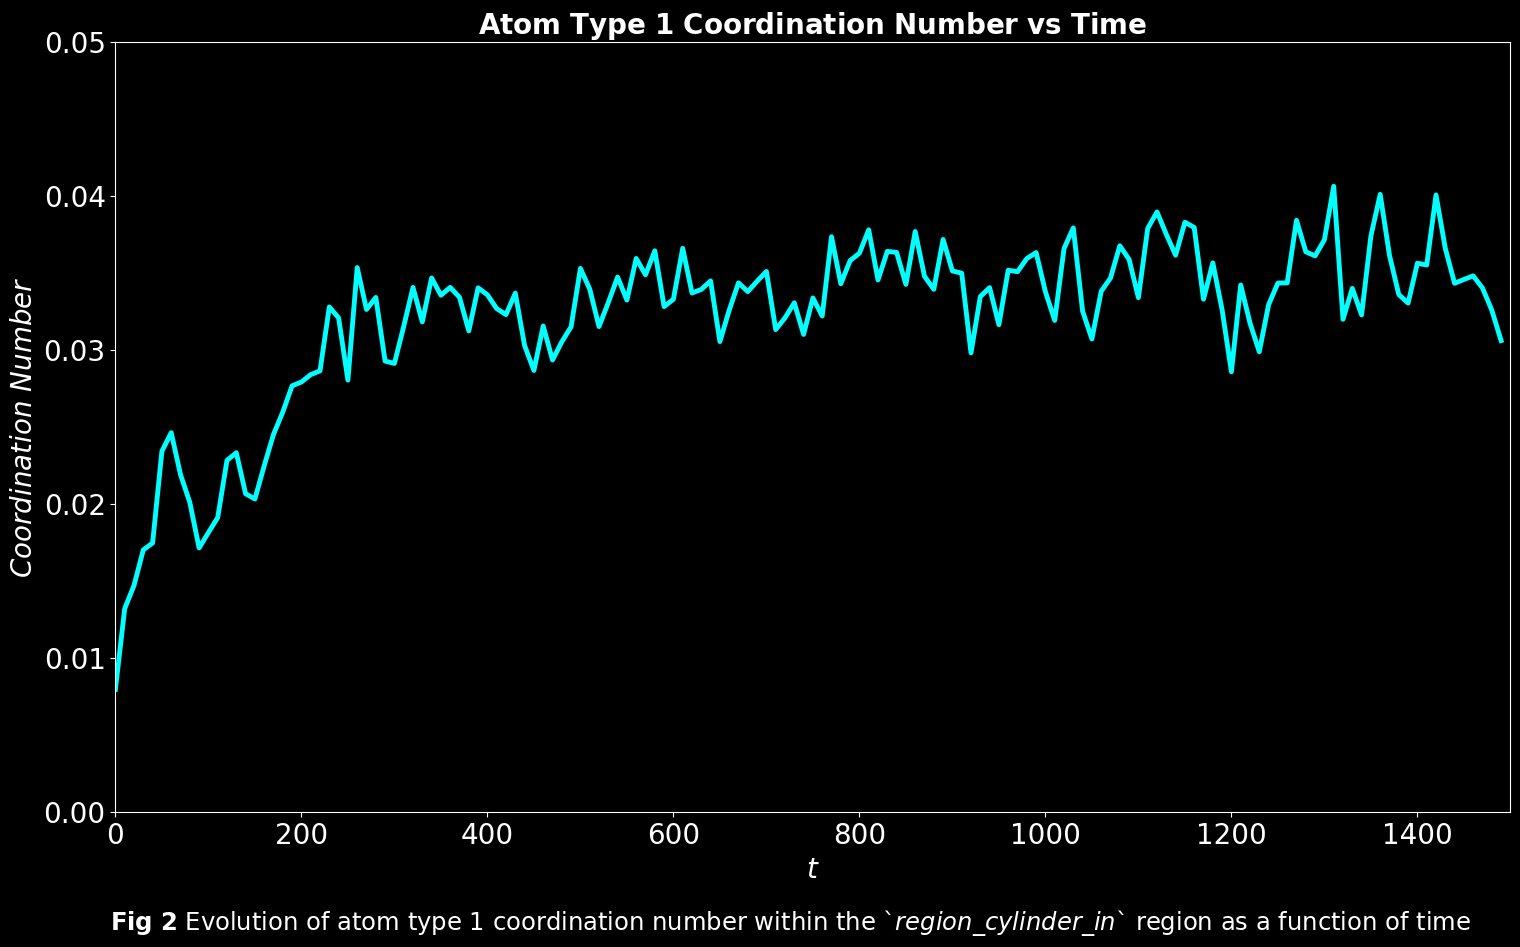

In [5]:
# Create 'atom type 1 coordination number vs time' line graph
LineGraph.single_line_graph(
    data_arrays=atom_coordination_number_vs_time_data_array,
    figure_size=(18, 10),
    line_colours=['cyan'],
    x_label=r'$t$',
    y_label=r'$Coordination\ Number$',
    x_lim=(0, 1500),
    y_lim=(0.00, 0.05),
    graph_title=r'$\bf{Atom\ Type\ 1\ Coordination\ Number\ vs\ Time}$',
    figure_text=r'$\bf{Fig\ 2}$ Evolution of atom type 1 coordination number within the `$region\_cylinder\_in$` '
                r'region as a function of time',
    figure_text_font_size=17.5,
    figure_text_x_coord=0.5,
    figure_text_y_coord=-0.0005,
    font_size=20,
    tick_label_size=20,
    line_width=3.5,
    save_path=os.path.join(base_dir, '../reports/figures/graphs/atom_type_1_coordination_vs_time.png')
)